<a href="https://colab.research.google.com/github/AnanyaGodse/Machine-Learning-II-Deep-Learning-/blob/main/Experiment_8_Autoencoders_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

### **LAB 8 - Autoencoders and PCA**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
iris = datasets.load_iris()
X = iris.data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def plot_loss(history, label):
    plt.plot(history.history['loss'], label=label)


In [ ]:
# Linear Autoencoder
input_layer = Input(shape=(X_scaled.shape[1],))
encoded = Dense(3, activation='linear')(input_layer)
decoded = Dense(X_scaled.shape[1], activation='linear')(encoded)
linear_autoencoder = Model(input_layer, decoded)
linear_autoencoder.compile(optimizer='adam', loss='mse')
history_linear = linear_autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=0)

In [ ]:
# Sigmoid-Based Non-Linear Autoencoder
encoded_sigmoid = Dense(3, activation='sigmoid')(input_layer)
decoded_sigmoid = Dense(X_scaled.shape[1], activation='sigmoid')(encoded_sigmoid)
sigmoid_autoencoder = Model(input_layer, decoded_sigmoid)
sigmoid_autoencoder.compile(optimizer='adam', loss='mse')
history_sigmoid = sigmoid_autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=0)

In [ ]:
# ReLU-Based Non-Linear Autoencoder
encoded_relu = Dense(3, activation='relu')(input_layer)
decoded_relu = Dense(X_scaled.shape[1], activation='relu')(encoded_relu)
relu_autoencoder = Model(input_layer, decoded_relu)
relu_autoencoder.compile(optimizer='adam', loss='mse')
history_relu = relu_autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=0)

In [ ]:
encoder_linear = Model(input_layer, encoded)
encoder_sigmoid = Model(input_layer, encoded_sigmoid)
encoder_relu = Model(input_layer, encoded_relu)

X_encoded_linear = encoder_linear.predict(X_scaled)
X_encoded_sigmoid = encoder_sigmoid.predict(X_scaled)
X_encoded_relu = encoder_relu.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# Compare with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

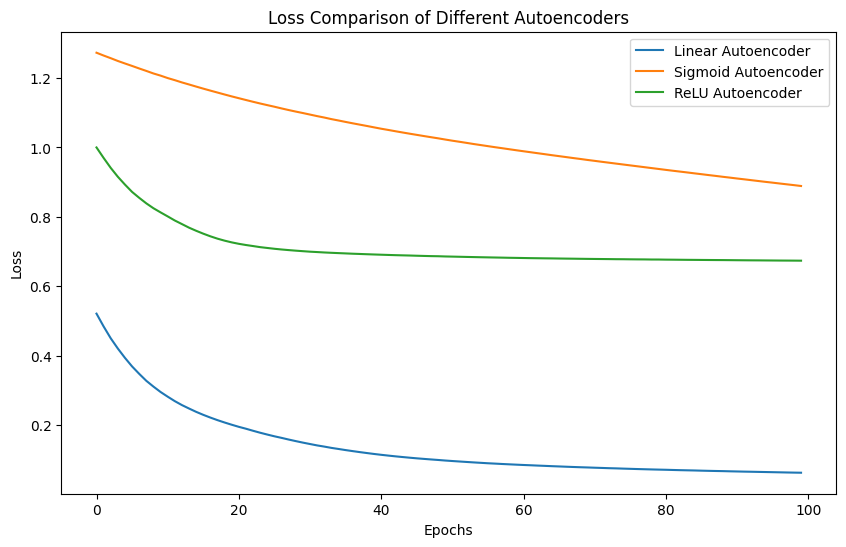

In [ ]:
plt.figure(figsize=(10, 6))
plot_loss(history_linear, 'Linear Autoencoder')
plot_loss(history_sigmoid, 'Sigmoid Autoencoder')
plot_loss(history_relu, 'ReLU Autoencoder')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison of Different Autoencoders')
plt.legend()
plt.show()